# Objectifs

1) Identifier les images qui ont été le mieux reconstruite

2) Afficher les meilleurs reconstructions LowRes / MiniHighResReconstruction / MiniHighResOriginal

In [6]:
import h5py
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.keras.applications import vgg19
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dropout, UpSampling2D, MaxPooling2D, Conv2DTranspose
from tensorflow.keras.optimizers import Adam

In [2]:
gpu_devices = tf.config.experimental.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(gpu_devices[0], True)

In [3]:
h5_path = 'train_tiles2.h5'
with h5py.File(h5_path, 'r') as h5:
    data = np.array(h5.get('lowres'))
    label = np.array(h5.get('highres'))

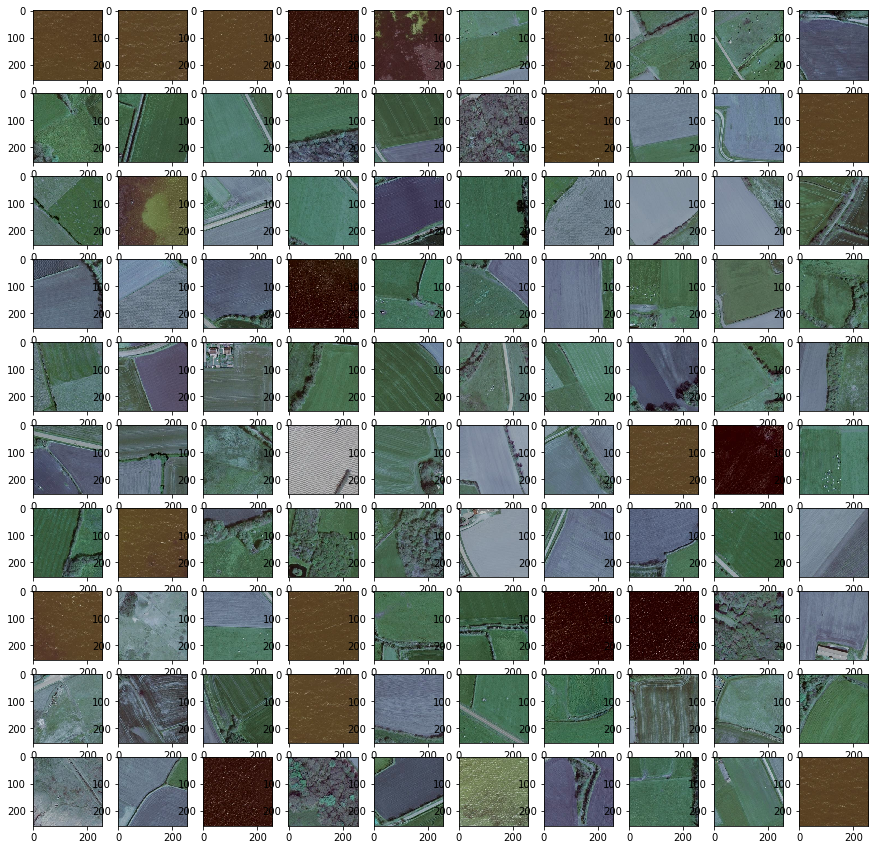

In [4]:
_, axarr = plt.subplots(10,10, figsize=(15,15))
for i in range(0, 10):
    for j in range(0, 10):
        axarr[i, j].imshow(label[i*10+j])

Model: "9m9-64-64-100-64-64-100-64-64-deconv2-glorot"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 64, 64, 64)        1792      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 64, 64, 64)        36928     
_________________________________________________________________
conv2d_transpose (Conv2DTran (None, 128, 128, 100)     57700     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 128, 128, 64)      57664     
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 128, 128, 64)      36928     
_________________________________________________________________
conv2d_transpose_1 (Conv2DTr (None, 256, 256, 100)     57700     
_________________________________________________________________
conv2d_6 (Conv2D)     

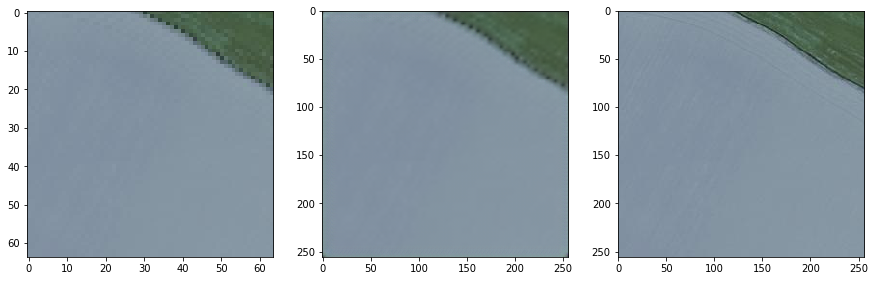

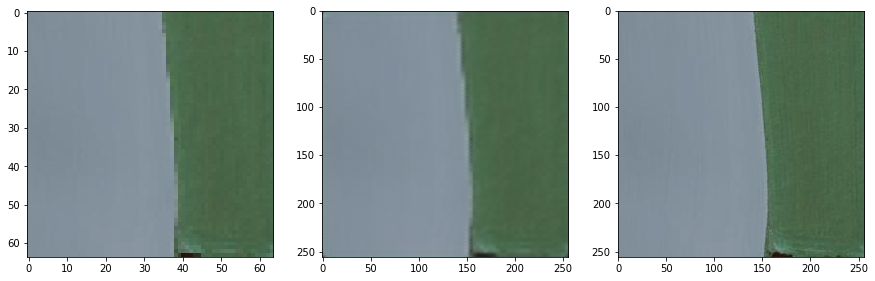

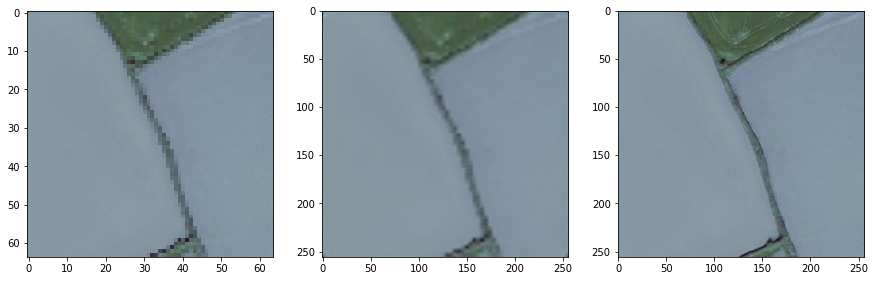

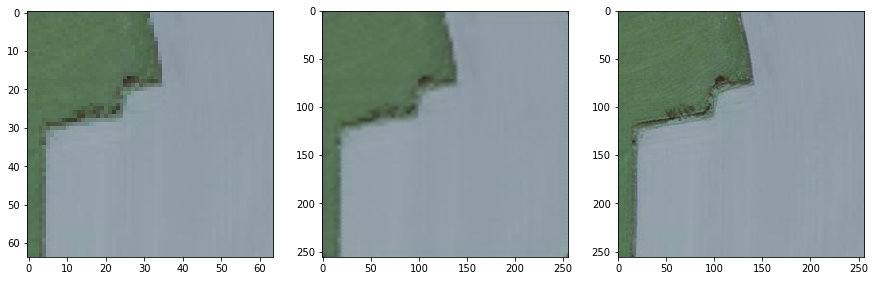

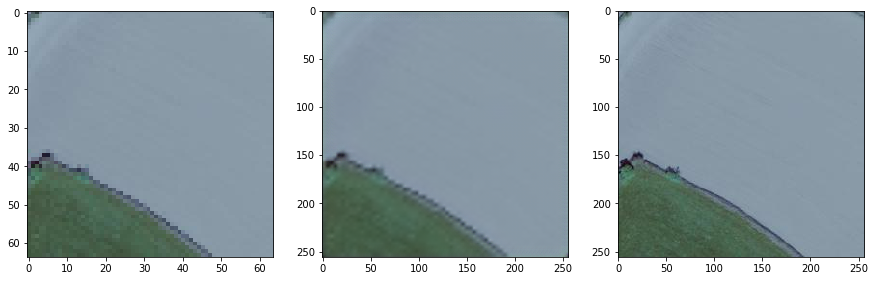

In [ ]:
# Load Model
model_name = "9m9-64-64-100-64-64-100-64-64-deconv2-glorot"
conv2d_params = { 
    'kernel_size': (3,3), 
    'strides': (1, 1), 
    'padding': 'same', 
    'activation': 'relu',
    'kernel_initializer': 'glorot_uniform'
}
conv2dt_params = { 
    'kernel_size': (3,3), 
    'strides': (2, 2), 
    'padding': 'same', 
    'activation': 'relu',
    'kernel_initializer': 'glorot_uniform'
}
model = Sequential(name=model_name)
model.add(Conv2D(filters=64, **conv2d_params, input_shape=(64,64,3)))
model.add(Conv2D(filters=64, **conv2d_params))
model.add(Conv2DTranspose(filters=100, **conv2dt_params))
model.add(Conv2D(filters=64, **conv2d_params))
model.add(Conv2D(filters=64, **conv2d_params))
model.add(Conv2DTranspose(filters=100, **conv2dt_params))
model.add(Conv2D(filters=64, **conv2d_params))
model.add(Conv2D(filters=64, **conv2d_params))
model.add(Conv2D(filters=3, **conv2d_params))
model.summary()
model.load_weights(f"models/{model_name}.h5")
model.compile(optimizer=Adam(),loss="mean_squared_error")
# Go through dataset
model.evaluate(x=data, y=label, batch_size=50)
predict = model.predict(x=data, batch_size=50)
errors = np.mean(np.abs(predict - label), axis=(1,2,3))
sort_index = np.argsort(errors)
# Show best results
for i in range(0,10):
    idx = sort_index[i]
    _, axarr = plt.subplots(1,3,figsize=(15,15))
    axarr[0].imshow(data[idx])
    axarr[1].imshow(predict[idx]/255)
    axarr[2].imshow(label[idx])

In [ ]:
# Load Model
model_name = "9m9-64-64-100-64-64-100-64-64-deconv2-glorot"
conv2d_params = { 
    'kernel_size': (3,3), 
    'strides': (1, 1), 
    'padding': 'same', 
    'activation': 'relu',
    'kernel_initializer': 'glorot_uniform'
}
conv2dt_params = { 
    'kernel_size': (3,3), 
    'strides': (2, 2), 
    'padding': 'same', 
    'activation': 'relu',
    'kernel_initializer': 'glorot_uniform'
}
model = Sequential(name=model_name)
model.add(Conv2D(filters=64, **conv2d_params, input_shape=(64,64,3)))
model.add(Conv2D(filters=64, **conv2d_params))
model.add(Conv2DTranspose(filters=100, **conv2dt_params))
model.add(Conv2D(filters=64, **conv2d_params))
model.add(Conv2D(filters=64, **conv2d_params))
model.add(Conv2DTranspose(filters=100, **conv2dt_params))
model.add(Conv2D(filters=64, **conv2d_params))
model.add(Conv2D(filters=64, **conv2d_params))
model.add(Conv2D(filters=3, **conv2d_params))
model.summary()
model.load_weights(f"models/{model_name}.h5")
model.compile(optimizer=Adam(),loss="mean_squared_error")
# Go through dataset
model.evaluate(x=data, y=label, batch_size=30)
predict = model.predict(x=data, batch_size=30)
errors = np.mean(np.abs(predict - label), axis=(1,2,3))
sort_index = np.argsort(errors)
# Show best results
for i in range(0,10):
    idx = sort_index[i]
    _, axarr = plt.subplots(1,3,figsize=(15,15))
    axarr[0].imshow(data[idx])
    axarr[1].imshow(predict[idx]/255)
    axarr[2].imshow(label[idx])